In [2]:
# import Datasets
import numpy as np
from glob import glob

#load filenames for different skin lesions for train, valid and test
train_files = np.array(glob("./data/train/*/*")) 
valid_files = np.array(glob("./data/valid/*/*"))
test_files = np.array(glob("./data/test/*/*"))

#number of images in each dataset
print("A total of {} train images".format(len(train_files)))
print("A total of {} valid images".format(len(valid_files)))
print("A total of {} test images".format(len(test_files)))

A total of 2000 train images
A total of 150 valid images
A total of 600 test images


In [47]:
train_files

array(['./data/train\\melanoma\\ISIC_0000002.jpg',
       './data/train\\melanoma\\ISIC_0000004.jpg',
       './data/train\\melanoma\\ISIC_0000013.jpg', ...,
       './data/train\\seborrheic_keratosis\\ISIC_0015233.jpg',
       './data/train\\seborrheic_keratosis\\ISIC_0015260.jpg',
       './data/train\\seborrheic_keratosis\\ISIC_0015295.jpg'],
      dtype='<U50')

In [51]:
test_files[2][2:]

'data/test\\melanoma\\ISIC_0012369.jpg'

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

./data/train\melanoma\ISIC_0000002.jpg
torch.Size([3, 224, 224])


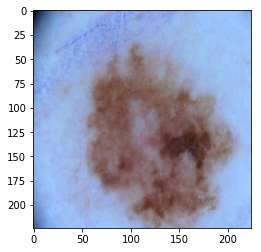

In [4]:
# look at an image
trans = transforms.Compose([
    #transforms.RandomResizedCrop(240),
    transforms.Resize((265,265)),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    
    transforms.ToPILImage()
    
])

image = train_files[0]
print(image)
img = Image.open(image)
plt.imshow(trans(img))
print(transforms.ToTensor()(trans((img))).shape)

In [5]:
# create transforms for dataloaders
# for inception_v3 we need 3x299x299 size
transforms_train = transforms.Compose([
    transforms.Resize((350,350)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])

transforms_valid = transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
])

transforms_test= transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

In [6]:
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

In [7]:
cancer_train = ImageFolder(root="./data/train/",transform=transforms_train)
cancer_valid = ImageFolder(root="./data/valid/",transform=transforms_valid)
cancer_test = ImageFolder(root="./data/test/",transform=transforms_test)

In [55]:
cancer_test.imgs

[('./data/test/melanoma\\ISIC_0012258.jpg', 0),
 ('./data/test/melanoma\\ISIC_0012356.jpg', 0),
 ('./data/test/melanoma\\ISIC_0012369.jpg', 0),
 ('./data/test/melanoma\\ISIC_0012395.jpg', 0),
 ('./data/test/melanoma\\ISIC_0012425.jpg', 0),
 ('./data/test/melanoma\\ISIC_0012758.jpg', 0),
 ('./data/test/melanoma\\ISIC_0012989.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013072.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013073.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013242.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013277.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013321.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013374.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013411.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013414.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013455.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013457.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013459.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013472.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013473.jpg', 0),
 ('./data/test/melanoma\\ISIC_0013565.jp

In [8]:
# dataloaders

loader_train = DataLoader(cancer_train, batch_size = 20, shuffle = True)

loader_valid =  DataLoader(cancer_valid, batch_size = 15, shuffle = True)

loader_test =  DataLoader(cancer_test, batch_size = 20, shuffle = False)

In [9]:
loaders_lesions = {"train": loader_train, "valid": loader_valid, "test": loader_test}

In [10]:
testing = 0
for batch_idx, (data, target) in enumerate(loader_valid):
    print("Batch idx: {}\n shape of input data: {}\n target:{}".format(batch_idx, data.shape, target))
    testing +=1
    if testing == 3:
        break
    

Batch idx: 0
 shape of input data: torch.Size([15, 3, 299, 299])
 target:tensor([1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1])
Batch idx: 1
 shape of input data: torch.Size([15, 3, 299, 299])
 target:tensor([0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0])
Batch idx: 2
 shape of input data: torch.Size([15, 3, 299, 299])
 target:tensor([1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1])


In [11]:
import torchvision.models as models

Google = models.inception_v3(pretrained=True)



In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [31]:
print(Google)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [13]:
# we are overfitting quickly, best validation loss is 0.55...
# maybe we can freeze all the parameters and only use the last layer for our problem
# let's see the effect of that

for param in Google.parameters():
    param.requires_grad = False


In [14]:
# put in another fc layer for our task
last_layer = nn.Linear(2048, 3)
Google.fc = last_layer
Google.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [15]:
model_lesions = Google

In [32]:
# specify loss and optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(Google.parameters(), lr=0.0003) # check if we get some results with that. Network is huge though...
optimizer = optim.Adam(model_lesions.parameters(), lr=0.00003) # check if we get some results with that. Network is huge though...

In [33]:
def train(n_epochs, loaders, model, optimizer, criterion, save_path):
    """returns a trained model, best model will be saved"""
    #initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1,n_epochs+1):
        #monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        ####
        #train the model
        ####
        model.train()
        for batch_idx, (data, target) in enumerate(loaders["train"]):
            # move to GPU
            data, target = data.to(device), target.to(device)
            
            #zero gradients
            optimizer.zero_grad()
            
            #print progress
            if (batch_idx+1) % 20 == 0:
                print("{} pictures done".format((batch_idx+1)*data.shape[0]))
            # find loss and update model parameters accordingly
            output, aux = model(data) # apparently the model returns aux_logits... 
            # whatever that means we don't get into it right now
            # loss function can only work with a variable, not a tuple
            loss = criterion(output, target)
            train_loss += (1/(batch_idx+1)) * (loss.data - train_loss)
            #take a step...
            loss.backward()
            optimizer.step()
        
        # validation
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders["valid"]):
            # move to GPU
            data, target = data.to(device), target.to(device)
            with torch.no_grad(): 
                # with .no_grad() the model apparently does not return aux logits
                output = model(data)
                loss = criterion(output,target)
                valid_loss += (1/(batch_idx+1)) * (loss.data - valid_loss)
                
        print("Epoch: {} \tTraining loss: {:.6f} \tValidation loss:{:.6f}".format(
        epoch,
        train_loss,
        valid_loss))
        
        # save the model if it has lowest validation loss
        if valid_loss_min > valid_loss:
            torch.save(model.state_dict(), save_path)
            print("saving model with valid_loss: {:.6f} \tOld loss: {:.6f}".format(valid_loss, valid_loss_min))
            valid_loss_min = valid_loss
    # return trained model
    return model

In [38]:
model_lesions = train(20, loaders_lesions, model_lesions, optimizer, criterion, "model_lesions_fr7.pt")

400 pictures done
800 pictures done
1200 pictures done
1600 pictures done
2000 pictures done
Epoch: 1 	Training loss: 0.389422 	Validation loss:0.556562
saving model with valid_loss: 0.556562 	Old loss: inf
400 pictures done
800 pictures done
1200 pictures done
1600 pictures done
2000 pictures done
Epoch: 2 	Training loss: 0.369676 	Validation loss:0.528971
saving model with valid_loss: 0.528971 	Old loss: 0.556562
400 pictures done
800 pictures done
1200 pictures done
1600 pictures done
2000 pictures done
Epoch: 3 	Training loss: 0.350609 	Validation loss:0.581348
400 pictures done
800 pictures done
1200 pictures done
1600 pictures done
2000 pictures done
Epoch: 4 	Training loss: 0.337875 	Validation loss:0.535313
400 pictures done
800 pictures done
1200 pictures done
1600 pictures done
2000 pictures done
Epoch: 5 	Training loss: 0.316426 	Validation loss:0.569352
400 pictures done
800 pictures done
1200 pictures done
1600 pictures done
2000 pictures done
Epoch: 6 	Training loss: 0.27

KeyboardInterrupt: 

In [17]:
# load saved model
# 0.55 val error model_lesions.pt
# 0.541437 val error model_lesions_freeze.pt
#  0.528971 val error model_lesions_fr7.pt
model_lesions.load_state_dict(torch.load('model_lesions_fr7.pt'))


In [16]:
# set the mixed7 layers to trainable, we already trained our last layer weights as a classifier for skin lesions
# in model_lesions_freeze.pt

mixed7 = False

for name, param in model_lesions.named_parameters():
    if mixed7 == False:
        param.requires_grad = False
    if name.find("Mixed_7") > -1:
        mixed7 = True

In [37]:
for name, param in model_lesions.named_parameters():
    if name.find("Mixed_7") > -1:
        print(param)

Parameter containing:
tensor([[[[-2.0797e-01, -3.4323e-01, -3.2874e-02],
          [-1.4008e-01, -2.5127e-01, -2.7569e-02],
          [ 7.6536e-02,  1.9493e-02,  3.8180e-02]],

         [[ 1.4394e-01,  1.5986e-01,  5.0819e-02],
          [ 8.3797e-02,  8.5988e-02,  1.7224e-02],
          [ 3.0537e-02,  1.4926e-02,  5.0089e-02]],

         [[ 1.0271e-01,  2.3177e-01, -3.1546e-02],
          [ 7.2235e-02,  1.6826e-01, -1.2386e-02],
          [-1.0050e-01, -2.3920e-02, -8.8329e-02]]],


        [[[-1.7628e-02,  1.7613e-02, -6.6610e-03],
          [ 1.2715e-02,  6.7420e-02,  9.6785e-03],
          [-1.1683e-02, -5.0312e-03, -3.6207e-02]],

         [[ 1.7292e-03, -1.0573e-02, -2.3184e-03],
          [ 9.8055e-03,  2.2813e-02,  8.0361e-03],
          [ 8.6585e-04, -4.4442e-03,  5.0137e-04]],

         [[-1.3716e-03,  3.5754e-02,  1.8069e-02],
          [ 2.3387e-02,  8.7725e-02,  4.6971e-02],
          [ 1.2935e-02,  3.9207e-02,  3.1808e-02]]],


        [[[ 1.5104e-03, -3.4657e-02,  4.5936

Parameter containing:
tensor([1.0001, 1.0014, 1.0051, 1.0007, 0.9982, 0.9997, 1.0030, 0.9990, 0.9941,
        0.9970, 1.0054, 1.0039, 1.0071, 0.9976, 0.9959, 1.0011, 1.0042, 1.0005,
        1.0038, 0.9995, 0.9928, 0.9989, 0.9951, 0.9891, 0.9940, 1.0045, 1.0032,
        0.9960, 0.9976, 1.0033, 1.0013, 0.9994, 1.0016, 1.0063, 0.9997, 0.9910,
        0.9997, 0.9935, 0.9979, 0.9987, 1.0005, 1.0012, 1.0026, 0.9949, 0.9972,
        1.0043, 1.0008, 0.9937, 0.9954, 1.0004, 1.0055, 1.0019, 1.0000, 1.0047,
        0.9986, 0.9942, 1.0020, 0.9948, 1.0000, 0.9894, 0.9949, 1.0026, 1.0050,
        0.9928, 1.0034, 1.0009, 0.9978, 0.9955, 0.9985, 0.9944, 0.9957, 0.9991,
        0.9988, 0.9920, 0.9942, 0.9985, 0.9923, 1.0014, 0.9953, 0.9995, 0.9968,
        1.0029, 1.0040, 1.0014, 0.9939, 1.0026, 1.0012, 0.9983, 1.0049, 1.0016,
        1.0027, 1.0035, 0.9983, 0.9980, 1.0046, 1.0028, 0.9996, 0.9957, 0.9958,
        0.9982, 1.0018, 0.9985, 1.0097, 1.0030, 1.0027, 0.9955, 0.9989, 1.0089,
        0.9952, 1.

Parameter containing:
tensor([1.0023, 0.9951, 0.9986, 1.0017, 1.0004, 0.9979, 0.9950, 0.9971, 1.0009,
        0.9943, 0.9945, 1.0018, 0.9920, 0.9981, 1.0015, 1.0031, 0.9992, 1.0095,
        1.0002, 1.0017, 0.9999, 1.0024, 0.9964, 1.0021, 0.9998, 1.0049, 1.0012,
        0.9981, 1.0005, 0.9960, 0.9997, 0.9948, 1.0063, 1.0003, 1.0038, 1.0050,
        1.0049, 1.0097, 1.0062, 0.9964, 1.0003, 1.0021, 1.0027, 1.0025, 1.0023,
        1.0009, 1.0015, 0.9988, 0.9974, 0.9965, 0.9955, 1.0008, 1.0033, 1.0004,
        1.0050, 1.0039, 0.9919, 1.0010, 1.0015, 0.9994, 0.9984, 1.0014, 0.9977,
        0.9949], device='cuda:0')
Parameter containing:
tensor([-0.4344, -0.4636,  0.0661,  3.5906, -0.3066,  0.2122,  0.0277, -0.2814,
        -0.4510,  0.0990,  0.0451,  0.1638, -0.2922,  0.7713,  0.0134, -0.6358,
        -0.0491,  0.3911, -0.2873, -0.2608,  1.8762,  0.0360, -0.3354, -0.0379,
        -0.5499, -0.1245,  4.0871, -0.2891,  0.2355, -0.2189, -0.4138,  0.2266,
         3.2541,  0.2252, -0.7684,  0.1238

Parameter containing:
tensor([[[[ 4.1465e-02]],

         [[-1.4925e-03]],

         [[-4.4379e-02]],

         ...,

         [[-1.7035e-04]],

         [[-1.7222e-02]],

         [[ 3.9066e-03]]],


        [[[ 3.6196e-03]],

         [[ 3.4448e-02]],

         [[-8.5752e-02]],

         ...,

         [[-3.9621e-02]],

         [[-2.0495e-02]],

         [[ 1.1373e-02]]],


        [[[-4.8848e-02]],

         [[ 1.3284e-02]],

         [[ 3.5987e-02]],

         ...,

         [[-2.9676e-02]],

         [[-8.5285e-03]],

         [[ 7.2952e-03]]],


        ...,


        [[[ 4.9385e-03]],

         [[-3.1036e-03]],

         [[ 1.6900e-02]],

         ...,

         [[-2.7854e-02]],

         [[-1.5948e-02]],

         [[ 2.6405e-02]]],


        [[[-4.7398e-02]],

         [[-2.4488e-02]],

         [[-8.6350e-02]],

         ...,

         [[-3.1310e-02]],

         [[ 2.3717e-02]],

         [[ 5.4966e-02]]],


        [[[ 2.5159e-02]],

         [[ 4.9425e-05]],

         [[-5.

Parameter containing:
tensor([[[[-0.0166]],

         [[-0.0018]],

         [[ 0.0144]],

         ...,

         [[-0.0138]],

         [[-0.0162]],

         [[ 0.0152]]],


        [[[-0.0052]],

         [[ 0.0324]],

         [[ 0.0650]],

         ...,

         [[ 0.0563]],

         [[ 0.0043]],

         [[ 0.0229]]],


        [[[-0.0215]],

         [[-0.0168]],

         [[-0.0856]],

         ...,

         [[ 0.0519]],

         [[-0.0207]],

         [[-0.0178]]],


        ...,


        [[[ 0.0365]],

         [[ 0.0353]],

         [[ 0.0085]],

         ...,

         [[-0.0149]],

         [[-0.0678]],

         [[ 0.0266]]],


        [[[-0.0141]],

         [[ 0.0305]],

         [[ 0.1090]],

         ...,

         [[-0.0425]],

         [[-0.0297]],

         [[-0.0126]]],


        [[[-0.0130]],

         [[ 0.0407]],

         [[-0.0245]],

         ...,

         [[ 0.0179]],

         [[ 0.0239]],

         [[-0.0476]]]], device='cuda:0')
Parameter contain

Parameter containing:
tensor([[[[ 5.1125e-02]],

         [[ 1.4135e-02]],

         [[ 7.1734e-02]],

         ...,

         [[-2.2793e-02]],

         [[ 2.1338e-04]],

         [[ 9.2070e-03]]],


        [[[-2.1704e-02]],

         [[ 5.5944e-02]],

         [[ 4.5130e-02]],

         ...,

         [[ 7.6427e-03]],

         [[-3.2631e-05]],

         [[-1.4689e-02]]],


        [[[-4.0132e-02]],

         [[-1.2103e-02]],

         [[-4.0231e-02]],

         ...,

         [[-4.8303e-02]],

         [[-3.9320e-02]],

         [[ 8.0314e-02]]],


        ...,


        [[[-2.7360e-02]],

         [[ 4.5136e-02]],

         [[-4.7781e-02]],

         ...,

         [[-3.9578e-02]],

         [[ 1.4343e-02]],

         [[ 7.9667e-02]]],


        [[[-4.7573e-02]],

         [[-5.8816e-02]],

         [[-5.3430e-02]],

         ...,

         [[-9.9233e-02]],

         [[ 7.9278e-02]],

         [[-2.9423e-02]]],


        [[[ 1.2110e-02]],

         [[ 1.4718e-02]],

         [[ 1.

Parameter containing:
tensor([[[[-4.1463e-03,  6.7773e-03,  2.0860e-03],
          [ 6.3432e-03,  5.4942e-03,  1.6875e-02],
          [ 1.5337e-02, -8.1978e-03, -1.1167e-02]],

         [[-6.7746e-03, -2.5276e-03, -1.8462e-03],
          [-4.7196e-03,  2.4509e-03, -8.3934e-03],
          [-5.0495e-03,  5.5820e-03, -6.6854e-04]],

         [[ 3.7873e-03,  1.7224e-02,  4.6902e-04],
          [ 2.5291e-02,  3.8366e-02,  3.1363e-02],
          [-9.0163e-03,  2.0508e-03, -6.4334e-03]],

         ...,

         [[-5.8445e-03, -7.6700e-03,  8.3684e-03],
          [-1.7629e-03, -7.2966e-03, -3.5620e-03],
          [ 7.1127e-03, -1.4178e-03, -7.1080e-03]],

         [[ 1.5710e-02,  3.9840e-03,  9.9847e-03],
          [ 2.0986e-02,  1.0215e-02,  1.3436e-02],
          [ 2.3944e-02,  1.8585e-02,  2.5460e-02]],

         [[-9.4346e-03, -1.8826e-02, -1.2653e-02],
          [-1.1931e-02, -1.4553e-02, -8.8099e-03],
          [ 2.1692e-04, -6.7642e-03,  5.7438e-03]]],


        [[[-4.5502e-03, -9.9826

Parameter containing:
tensor([[[[-2.2906e-02, -2.9751e-02, -5.1622e-02],
          [-1.3106e-02, -9.2330e-03, -2.3817e-02],
          [-7.0789e-03, -9.5250e-03,  3.3123e-03]],

         [[-4.6765e-02,  9.4299e-02,  9.2154e-02],
          [-2.8847e-02,  1.1135e-01,  8.5512e-02],
          [-5.1710e-02,  1.1398e-02,  3.6341e-02]],

         [[ 1.1013e-02,  2.3722e-02,  2.3591e-03],
          [-2.3641e-03, -3.2493e-03,  4.5729e-03],
          [-5.2063e-03, -1.3984e-02, -1.2453e-02]],

         ...,

         [[ 3.6471e-03, -1.2732e-02, -2.4549e-02],
          [ 1.3629e-02, -1.9212e-02, -1.5133e-02],
          [ 8.8076e-03,  1.7231e-02, -5.1659e-03]],

         [[-2.7255e-02,  4.5358e-03,  3.5707e-02],
          [-6.0263e-02,  5.6887e-03,  2.4418e-02],
          [-4.2388e-02,  4.3596e-03,  3.3928e-02]],

         [[ 1.4683e-02,  1.6365e-02, -3.9540e-03],
          [ 1.4226e-02,  4.3473e-03,  7.5400e-03],
          [-2.0330e-03,  5.4920e-03, -1.0481e-03]]],


        [[[-2.6195e-02, -2.1271

Parameter containing:
tensor([[[[-0.0055],
          [ 0.0161],
          [ 0.0298],
          ...,
          [-0.0272],
          [ 0.0058],
          [ 0.0055]],

         [[-0.0026],
          [-0.0021],
          [-0.0017],
          ...,
          [-0.0055],
          [-0.0135],
          [-0.0134]],

         [[ 0.0162],
          [ 0.0351],
          [ 0.0352],
          ...,
          [-0.0044],
          [-0.0127],
          [ 0.0169]],

         ...,

         [[ 0.0089],
          [-0.0066],
          [ 0.0009],
          ...,
          [-0.0147],
          [-0.0125],
          [-0.0083]],

         [[-0.0297],
          [-0.0310],
          [-0.0317],
          ...,
          [ 0.0405],
          [ 0.0051],
          [ 0.0159]],

         [[-0.0045],
          [ 0.0145],
          [ 0.0089],
          ...,
          [-0.0247],
          [ 0.0122],
          [-0.0038]]],


        [[[-0.0205],
          [-0.0038],
          [ 0.0172],
          ...,
          [-0.0420],
    

Parameter containing:
tensor([0.9958, 0.9981, 0.9972, 1.0016, 0.9943, 0.9979, 0.9902, 1.0020, 0.9970,
        1.0007, 1.0044, 1.0059, 0.9986, 0.9913, 1.0027, 1.0041, 1.0045, 1.0048,
        0.9993, 1.0079, 0.9971, 1.0057, 1.0053, 1.0028, 0.9913, 1.0044, 1.0099,
        0.9950, 0.9930, 0.9946, 0.9937, 1.0019, 0.9951, 0.9959, 0.9978, 1.0051,
        1.0056, 0.9998, 0.9971, 1.0003, 1.0059, 1.0003, 1.0081, 1.0003, 1.0034,
        1.0046, 0.9941, 0.9990, 1.0005, 0.9939, 1.0080, 1.0019, 0.9976, 0.9987,
        0.9984, 1.0074, 0.9973, 1.0023, 0.9931, 1.0025, 0.9998, 1.0004, 0.9985,
        0.9989, 1.0010, 1.0022, 1.0090, 0.9966, 1.0032, 1.0040, 1.0041, 0.9952,
        0.9962, 1.0033, 1.0012, 0.9956, 1.0048, 0.9876, 1.0020, 0.9963, 0.9967,
        1.0054, 1.0040, 1.0022, 1.0009, 0.9939, 0.9982, 0.9990, 0.9995, 0.9965,
        0.9956, 0.9967, 0.9980, 0.9954, 0.9977, 0.9997, 1.0037, 0.9904, 0.9997,
        1.0037, 1.0011, 0.9971, 1.0017, 0.9966, 0.9916, 0.9993, 1.0070, 1.0056,
        0.9953, 1.

Parameter containing:
tensor([0.9901, 0.9937, 1.0016, 1.0011, 1.0014, 0.9971, 0.9956, 0.9937, 1.0061,
        0.9956, 1.0020, 0.9940, 1.0072, 1.0066, 0.9957, 0.9970, 0.9938, 0.9980,
        0.9982, 0.9992, 1.0010, 1.0021, 0.9922, 0.9986, 1.0005, 0.9944, 0.9961,
        1.0050, 0.9952, 1.0028, 0.9942, 0.9927, 1.0011, 0.9967, 0.9918, 0.9962,
        1.0003, 0.9973, 1.0037, 0.9872, 0.9950, 1.0044, 1.0019, 1.0014, 0.9958,
        1.0029, 0.9937, 0.9986, 1.0108, 0.9998, 0.9980, 0.9972, 1.0097, 1.0017,
        0.9945, 0.9994, 1.0115, 0.9989, 0.9961, 1.0024, 0.9984, 0.9979, 1.0056,
        0.9949, 1.0008, 1.0033, 0.9967, 0.9964, 0.9997, 0.9983, 1.0012, 1.0030,
        0.9991, 0.9971, 0.9974, 0.9966, 1.0006, 0.9958, 1.0032, 0.9962, 1.0041,
        1.0045, 1.0004, 1.0062, 1.0010, 0.9994, 1.0069, 0.9982, 0.9985, 0.9931,
        0.9998, 0.9930, 0.9992, 0.9940, 0.9967, 0.9959, 0.9939, 1.0069, 0.9981,
        0.9972, 1.0070, 0.9952, 0.9997, 0.9944, 0.9970, 0.9929, 0.9931, 1.0074,
        0.9964, 0.

Parameter containing:
tensor([[[[-3.2876e-02],
          [-2.1584e-02],
          [-2.1296e-02],
          ...,
          [ 1.8633e-02],
          [-1.5898e-02],
          [ 6.4559e-03]],

         [[-1.6088e-02],
          [-9.0938e-03],
          [-3.7426e-02],
          ...,
          [ 4.0806e-02],
          [ 7.1047e-03],
          [-5.4491e-03]],

         [[-1.2538e-02],
          [-1.4853e-02],
          [-2.2442e-02],
          ...,
          [ 6.6284e-03],
          [-2.9034e-03],
          [ 3.7894e-03]],

         ...,

         [[ 1.7570e-03],
          [-9.7391e-03],
          [-5.1821e-03],
          ...,
          [-2.9677e-02],
          [-2.5999e-02],
          [-6.7917e-03]],

         [[ 1.1171e-03],
          [-7.4863e-04],
          [-1.9834e-03],
          ...,
          [-7.3462e-03],
          [-1.3360e-02],
          [-1.1440e-04]],

         [[-1.3643e-03],
          [-1.1302e-02],
          [-3.2457e-03],
          ...,
          [-3.3333e-03],
          [-2

Parameter containing:
tensor([[[[-7.3757e-03, -2.1890e-02, -2.0934e-02,  ..., -5.8241e-03,
            2.2725e-03, -6.4017e-03]],

         [[-9.5790e-02, -2.7281e-02,  2.2599e-02,  ..., -2.0759e-03,
           -3.3444e-02,  1.4321e-02]],

         [[-1.6241e-02, -1.0599e-02,  3.7111e-03,  ...,  8.7436e-03,
           -6.2983e-03,  7.5511e-03]],

         ...,

         [[-3.7097e-02, -1.8822e-02,  1.4740e-02,  ...,  1.8927e-02,
            2.0021e-02,  4.3105e-02]],

         [[ 2.4625e-02, -6.2608e-03, -2.4169e-03,  ..., -1.5331e-02,
           -5.0807e-03, -9.6871e-03]],

         [[-7.2948e-02, -1.4601e-02, -1.7457e-02,  ...,  1.7466e-03,
            1.9114e-03,  2.4815e-02]]],


        [[[ 1.3897e-02,  5.8841e-03, -7.6660e-03,  ..., -1.3358e-02,
           -3.3001e-03,  1.3148e-02]],

         [[ 2.6490e-02,  1.1695e-02,  5.4503e-05,  ...,  1.2288e-02,
            4.5694e-03,  1.8438e-02]],

         [[ 1.3689e-02,  4.6500e-03,  4.4354e-03,  ...,  4.2005e-03,
            6.7484e-

Parameter containing:
tensor([[[[ 0.0473]],

         [[-0.0178]],

         [[ 0.0269]],

         ...,

         [[ 0.0248]],

         [[ 0.0183]],

         [[ 0.0280]]],


        [[[-0.0567]],

         [[-0.0284]],

         [[-0.0117]],

         ...,

         [[-0.0150]],

         [[-0.0042]],

         [[ 0.0404]]],


        [[[ 0.0305]],

         [[ 0.0395]],

         [[ 0.0145]],

         ...,

         [[ 0.0522]],

         [[-0.0091]],

         [[-0.0246]]],


        ...,


        [[[ 0.0031]],

         [[-0.0875]],

         [[-0.0145]],

         ...,

         [[-0.0254]],

         [[-0.0135]],

         [[-0.0557]]],


        [[[-0.0070]],

         [[-0.0183]],

         [[-0.0755]],

         ...,

         [[-0.0104]],

         [[-0.0690]],

         [[-0.0448]]],


        [[[-0.0363]],

         [[-0.0334]],

         [[ 0.0299]],

         ...,

         [[ 0.0237]],

         [[-0.0559]],

         [[-0.0025]]]], device='cuda:0')
Parameter contain

Parameter containing:
tensor([-0.3710,  0.1894, -0.4359, -0.5646, -0.1747, -0.0118, -0.3909, -0.6186,
        -0.4336, -0.7778, -0.6385, -0.4600, -0.7236, -0.3311, -0.3152, -1.3916,
        -1.2115,  0.2253, -0.5380, -0.5486, -0.3943, -0.5777, -0.5863, -0.4725,
         0.0063, -0.6338, -0.3177, -0.5543, -0.2768, -0.8604, -0.6820,  0.0785,
        -0.2613, -0.5025, -0.5600, -0.7226, -0.2945, -0.6513, -0.6706, -0.5922,
        -0.9032, -0.5669, -0.3560, -0.5612, -0.8124, -0.5700, -0.7095, -0.3417,
        -0.5802, -0.2442, -0.6922, -0.5605, -0.3432, -0.2927, -0.4261, -0.4468,
        -0.8621, -0.8094, -0.4421, -0.0808, -0.7782, -0.4908, -0.4909, -0.7707,
        -0.2077,  0.1875, -0.5339, -0.4079, -0.5889, -0.2984, -0.8753, -0.6344,
        -0.2974, -0.5464, -0.3559, -0.3552, -0.5471, -0.1704, -0.4876, -0.9420,
        -0.8262, -0.7458, -0.9937, -0.1906, -0.4717,  0.0488, -0.4402, -0.4811,
        -0.7123, -0.6666, -0.3255, -1.2763, -0.4047, -0.2285, -0.6322, -0.9464,
        -0.2338, -

Parameter containing:
tensor([1.0020, 0.9986, 1.0025, 1.0034, 1.0007, 0.9958, 0.9989, 1.0024, 1.0081,
        0.9939, 0.9978, 0.9994, 0.9967, 1.0002, 0.9995, 1.0066, 0.9986, 1.0063,
        1.0054, 1.0067, 1.0047, 1.0056, 1.0007, 0.9994, 1.0035, 1.0021, 0.9962,
        1.0101, 0.9945, 0.9942, 1.0003, 1.0045, 1.0072, 0.9952, 1.0031, 1.0036,
        0.9949, 0.9942, 1.0015, 1.0019, 1.0063, 1.0065, 0.9966, 0.9956, 0.9938,
        0.9978, 1.0025, 0.9990, 1.0026, 1.0009, 0.9958, 1.0010, 1.0031, 0.9988,
        1.0012, 0.9972, 0.9985, 0.9983, 1.0009, 0.9996, 0.9975, 1.0002, 1.0008,
        1.0022, 0.9945, 0.9996, 0.9983, 0.9876, 1.0044, 1.0057, 1.0034, 0.9980,
        1.0018, 0.9946, 0.9948, 1.0053, 0.9976, 0.9958, 1.0005, 0.9983, 1.0012,
        1.0001, 0.9988, 0.9960, 1.0035, 1.0006, 0.9972, 1.0002, 1.0009, 1.0016,
        0.9961, 0.9986, 1.0024, 1.0005, 1.0061, 0.9962, 1.0011, 1.0052, 1.0020,
        0.9993, 1.0038, 0.9999, 1.0013, 0.9988, 1.0016, 0.9969, 1.0048, 0.9982,
        1.0008, 0.

Parameter containing:
tensor([-6.9887e-01, -6.3703e-03,  1.8965e-01, -5.7506e-01, -2.9996e-01,
        -7.1060e-01, -7.5528e-01, -3.1145e-01, -3.2659e-01, -2.5962e-01,
        -3.3557e-01, -1.1303e+00, -4.3002e-01,  1.7918e-01, -9.5599e-01,
        -5.9697e-01, -5.9971e-01,  5.0778e-01, -9.7473e-01, -8.3915e-02,
        -6.8745e-01, -3.1470e-01, -4.7608e-02, -8.9794e-01, -8.1498e-01,
        -6.9170e-01, -3.3781e-01, -1.1462e+00, -6.7636e-04, -4.8340e-01,
        -1.8312e-01, -2.6644e-01, -1.5408e-01, -5.0840e-01, -4.7597e-02,
        -5.1090e-01, -5.7054e-01, -1.6341e-01, -5.6004e-01, -2.6516e-01,
        -5.4379e-01, -2.1209e-01, -7.4036e-02, -1.1678e+00, -3.7260e-01,
        -4.9455e-01, -2.9835e-01, -3.1200e-01, -3.9796e-01, -3.3496e-01,
        -5.6528e-01, -7.3166e-01, -3.2440e-01, -1.0289e+00, -3.1135e-01,
        -4.0594e-01, -2.7321e-01, -6.4636e-01, -3.5954e-01, -3.9130e-01,
        -4.7798e-01, -4.1323e-01, -4.1794e-01, -5.3460e-01,  1.4730e-01,
        -3.4887e-01, -3.1040e

Parameter containing:
tensor([[[[-0.0212]],

         [[-0.0079]],

         [[ 0.0210]],

         ...,

         [[-0.0282]],

         [[ 0.0094]],

         [[-0.0075]]],


        [[[ 0.0401]],

         [[-0.0202]],

         [[ 0.0348]],

         ...,

         [[-0.0517]],

         [[ 0.0178]],

         [[-0.0804]]],


        [[[ 0.0252]],

         [[-0.0073]],

         [[ 0.0154]],

         ...,

         [[ 0.0003]],

         [[-0.0256]],

         [[ 0.0076]]],


        ...,


        [[[-0.0215]],

         [[-0.0207]],

         [[ 0.0159]],

         ...,

         [[ 0.0131]],

         [[ 0.0664]],

         [[-0.0429]]],


        [[[ 0.0070]],

         [[ 0.0049]],

         [[-0.1418]],

         ...,

         [[ 0.0118]],

         [[ 0.0149]],

         [[-0.0323]]],


        [[[ 0.0328]],

         [[-0.0381]],

         [[-0.0047]],

         ...,

         [[-0.0100]],

         [[-0.0153]],

         [[-0.0704]]]], device='cuda:0')
Parameter contain

Parameter containing:
tensor([-1.5380, -0.9726, -1.3345, -1.1341, -0.8491, -1.2545, -1.4088, -0.5880,
        -1.6406, -1.8316, -0.8707, -1.5356, -0.7807, -1.2970, -1.5128, -0.7156,
        -1.6540, -1.4281, -1.4641, -1.5218, -1.2286, -1.2488, -1.4848, -1.0425,
        -1.8019, -1.7411, -1.0221, -0.9485, -1.0047, -1.3117, -1.6635, -0.7773,
        -1.0223, -0.9772, -1.4834, -1.0573, -1.0974, -0.8662, -1.3783, -1.3184,
        -1.2332, -1.3479, -1.2006, -1.0165, -1.2247, -0.7832, -0.7293, -1.7738,
        -1.4387, -0.4196, -1.6484, -1.1794, -1.5519, -1.3920, -0.8805, -0.3272,
        -1.0252, -1.0821,  0.2163, -0.6041, -1.8913, -1.4434, -1.5611, -1.1961,
        -0.7960, -0.7801, -1.2690, -1.1739, -1.3586, -1.1541, -0.4431, -1.4317,
        -1.0111, -1.4625, -0.9695, -1.2556, -1.8027, -1.3909, -1.4288, -1.7393,
        -0.8450, -0.8389, -1.1225, -1.3492, -1.1497, -1.1334, -0.9466, -0.6966,
        -1.3349, -0.9426, -0.9186,  2.6387, -1.2268, -1.1359, -1.1725, -1.1569,
        -1.3029, -

Parameter containing:
tensor([-0.9248, -0.5030, -0.4513, -0.8655, -0.8181, -0.4399, -0.6980, -1.1295,
        -0.8536, -0.5380, -0.6563, -0.2631, -0.7038, -0.8627, -0.8349, -0.8987,
        -0.2484, -0.5427, -0.8678, -0.5010, -0.7148, -1.1270, -0.6638, -0.9127,
        -0.5484, -0.5599, -0.8892, -0.6387, -0.9461, -0.6262, -0.7631, -0.7764,
        -0.8846, -0.9700, -0.7574, -0.9911, -0.7329, -0.8311, -1.0386, -0.8051,
        -0.9836, -0.7483, -0.7708, -0.9479, -0.7906, -0.9544, -0.6694, -0.9793,
        -0.9852, -0.8831, -0.9427, -0.7374, -0.8573, -0.7170, -0.9127, -0.4425,
        -0.9111, -0.9559, -0.8157, -1.0183, -0.8507, -0.9635, -0.9403, -0.9625,
        -0.4750, -0.8783, -0.8565, -1.0916, -0.9379, -0.9954, -1.5018, -0.7785,
        -0.8029, -0.6650, -0.7223, -0.4673, -0.7354, -0.8873, -0.3885, -0.2674,
        -0.9998, -1.0152, -0.6345, -0.3551, -0.5219, -1.0176, -0.5398, -1.0144,
        -0.6823, -0.8002, -1.0370, -1.1469, -0.9556, -0.8028, -0.5955, -0.4609,
        -1.0965, -

Parameter containing:
tensor([1.0092, 0.9947, 0.9948, 1.0074, 0.9949, 0.9999, 1.0000, 1.0015, 0.9981,
        1.0018, 0.9998, 1.0018, 1.0036, 1.0017, 1.0025, 1.0040, 0.9974, 1.0005,
        0.9995, 1.0010, 1.0039, 0.9986, 0.9977, 0.9989, 1.0002, 1.0011, 1.0033,
        1.0053, 1.0004, 0.9949, 0.9956, 0.9994, 1.0026, 0.9966, 0.9968, 1.0030,
        0.9951, 0.9985, 1.0025, 0.9964, 0.9989, 1.0015, 0.9985, 0.9989, 1.0010,
        1.0012, 1.0016, 1.0021, 0.9985, 1.0003, 0.9961, 1.0052, 0.9949, 0.9996,
        1.0037, 0.9985, 1.0021, 1.0062, 0.9990, 1.0045, 0.9989, 0.9977, 0.9985,
        0.9990, 1.0007, 0.9923, 1.0009, 0.9957, 1.0000, 1.0022, 0.9991, 1.0067,
        1.0067, 1.0031, 0.9986, 0.9945, 1.0015, 1.0025, 1.0077, 0.9990, 1.0041,
        0.9940, 1.0026, 1.0045, 1.0022, 1.0024, 1.0051, 1.0001, 1.0001, 1.0067,
        0.9982, 1.0004, 0.9969, 1.0100, 0.9960, 0.9989, 0.9999, 0.9913, 1.0018,
        1.0031, 0.9984, 1.0042, 1.0003, 0.9965, 0.9986, 1.0019, 0.9940, 0.9959,
        1.0057, 0.

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.

Parameter containing:
tensor([ 5.1081e-01, -3.8650e-01,  1.6275e-02, -2.0383e-03, -4.0119e-01,
        -3.3956e-01, -9.9940e-02, -1.8652e-01, -3.6152e-01, -3.0170e-01,
        -2.4699e-01,  1.9881e-01, -1.3762e-01,  7.9097e-02, -1.8939e-01,
        -1.3261e-01,  2.0474e-01,  2.2415e-01,  7.9805e-02, -1.2211e-01,
        -3.4490e-01, -1.4782e-01,  2.3240e-01,  6.6019e-02,  2.3951e-02,
        -3.3879e-01, -1.6616e-01, -1.2041e-01,  1.1442e-01,  4.2143e-01,
         1.0295e-01, -4.2541e-01, -2.0354e-01, -5.0590e-02, -3.6596e-01,
        -1.5402e-01, -2.5707e-01,  8.9627e-02, -1.7036e-02,  3.5484e-01,
        -1.5484e-01,  3.9021e-01, -3.1325e-01, -4.2884e-01,  7.3713e-01,
         3.3738e-01,  8.4334e-02,  2.3207e-01, -3.9381e-01, -1.7261e-01,
        -3.0008e-01,  2.8373e-01, -2.7582e-01, -1.0477e-01, -4.5942e-01,
        -6.4483e-02, -1.3186e-01,  2.8850e-01,  1.7357e-01, -2.7492e-01,
        -6.1055e-02, -1.9038e-01, -2.3321e-02,  1.6908e-02, -1.0162e-01,
        -2.8543e-01, -1.9987e

In [40]:
# test the model
def test(loaders, model, criterion):
    #monitor losses and accuracy
    test_loss = 0.0
    correct=0.0
    total =0.0

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders["test"]):
        # move to GPU
        data, target = data.to(device), target.to(device)
        with torch.no_grad():
            output = model(data)
            loss = criterion(output,target)
            test_loss += (1/(batch_idx+1)) * (loss.data - test_loss)
            #convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            #compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
    print("Test loss: {:.6f}\n".format(test_loss))
    print("\nTest Accuracy: %2d%% (%2d/%2d)" % (100. * correct/total, correct, total))

In [41]:
test(loaders_lesions, model_lesions, criterion)

# next we try to unfreeze the other layers higher up (higher level features) after we trained the weights of our classifier
# then train some more and compare - mixed7x layers will be fine tuned (pretrained = True)!

Test loss: 0.681650


Test Accuracy: 72% (437/600)


In [ ]:
"""
for 0.55 val error model_lesions.pt
Test loss: 0.892396


Test Accuracy: 60% (360/600)


for 0.541437 val error model_lesions_freeze
Test loss: 0.710257


Test Accuracy: 68% (409/600)


for   0.528971  val error model_lesions_fr7
Test loss: 0.681650


Test Accuracy: 72% (437/600)
"""

In [20]:
# write test results to a dict and convert to csv for submission
import pandas as pd

# melanoma is 0 - task1
# nevus is 1
# keratosis is 2 - task2

def submission(loaders, model, save_path, test_IDs):
    #create lists for storing of results
    prob_mel = []
    prob_ker = []
    pic_ids = []
    stop = 0
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders["test"]):
        if stop==2:
            break
        # move to GPU
        data, target = data.to(device), target.to(device)
        with torch.no_grad():
            output = model(data)
            # we have the output probabilities across dim 1
            # apply LogSoftmax
            probs = F.softmax(output, dim=1)
            # write the probs and IDs to list
            for el_mel, el_ker in zip((probs.cpu().numpy()[:,0]).astype(np.float64),
                                      (probs.cpu().numpy()[:,2]).astype(np.float64)):
                prob_mel.append(el_mel)
                prob_ker.append(el_ker)
            #prob_mel.append((probs.cpu().numpy()[:,0]).astype(np.float64))
            #prob_ker.append((probs.cpu().numpy()[:,2]).astype(np.float64))
            #stop += 1
    stop = 0
    for ids in test_IDs:
        if stop==40:
            break
        pic_ids.append(ids[2:])
        #stop += 1
    # write lists to DF then to csv file
    subs = pd.DataFrame({"Id": pic_ids, "task_1": prob_mel, "task_2": prob_ker}).to_csv(path_or_buf = save_path,
                                                                                        index=False)
    
    return subs
    

In [21]:
subs = submission(loaders_lesions, model_lesions, "submission_google_fr7.csv",test_files)

In [67]:
subs

In [ ]:
cancer_test.imgs